In [115]:
import pandas as pd
import numpy as np

import os
from env import get_db_url

import seaborn as sns
import matplotlib.pyplot as plt

# Acquire

In [20]:
def get_zillow_data():
    '''
    Arguments: none
    Actions: 
        1. If file exists in current working directory, opens file
        2. If file doesn't exist in current working directory, querys MySQL database and saves it to the current working directory
    Returns: df
    Modules: pandas as pd, from env import get_db_url, os
    '''
    
#     assigns filename
    filename = 'zillow.csv'
    
    # checks to see if the file exists in the working directory
    if os.path.exists(filename):
        
        # opens file and assigns it to a variable
        df = pd.read_csv(filename, index_col=0)
        
        # returns the df
        return df
    
    else:
        
        # assigns MySQL query to the variables
        query = '''SELECT
                      bedroomcnt,
                      bathroomcnt,
                      calculatedfinishedsquarefeet,
                      taxvaluedollarcnt,
                      yearbuilt,
                      taxamount,
                      fips
                    FROM properties_2017
                    WHERE propertylandusetypeID = 261;'''
        
        # creates a database variable
        db = 'zillow'
        
        # assign MySQL url to url variable
        url = get_db_url(db)
        
        # reads results from query and assigns it to df
        df = pd.read_sql(query, url)

        # saves results to local file
        df.to_csv(filename)
        
        # returns the dataframe
        return df

In [3]:
query = '''SELECT
  bedroomcnt,
  bathroomcnt,
  calculatedfinishedsquarefeet,
  taxvaluedollarcnt,
  yearbuilt,
  taxamount,
  fips
FROM properties_2017
WHERE propertylandusetypeID = 261;'''

In [4]:
url = get_db_url('zillow')

In [5]:
df = pd.read_sql(query, url)

In [6]:
filename = 'zillow.csv'

In [10]:
df.to_csv(filename)

In [12]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [91]:
df = get_zillow_data()

In [24]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


# Messy Data Summary


In [27]:
# checking rows and columns, I believe each row is a property and each columns is inforation about that property
df.shape

(2152863, 7)

In [29]:
# this is surprising, the non-null values do not appear in the info, but I know for a fact that some of these have nulls, we will have to inspect a diferent way
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 131.4 MB


In [33]:
# finding null values
df['calculatedfinishedsquarefeet'].isna().value_counts()

False    2144379
True        8484
Name: calculatedfinishedsquarefeet, dtype: int64

In [34]:
# ok there is some variety here we need to investigate
for col in df:
    print(df[col].isna().value_counts())`

False    2152852
True          11
Name: bedroomcnt, dtype: int64
False    2152852
True          11
Name: bathroomcnt, dtype: int64
False    2144379
True        8484
Name: calculatedfinishedsquarefeet, dtype: int64
False    2152370
True         493
Name: taxvaluedollarcnt, dtype: int64
False    2143526
True        9337
Name: yearbuilt, dtype: int64
False    2148421
True        4442
Name: taxamount, dtype: int64
False    2152863
Name: fips, dtype: int64


**Notes:**

* ##### Nulls:
    * Bedroom and Bathroomcnt have the same number of null values, these may be the same properties/observations 
        * I think we will definitely just drop these instead of filling them in
    * fips doesn't have any missing values which makes sense becasue the fips is the location and a property listing without the location doesnt make any sense tbh you vant sell a property without knowing its locations
    * all other observations have larger amounts of data missing which I would like to investigate further before moving on. I think first, I want to see if there are
* ##### Floats:
    * Not all the values require the datatype to be a float, see if there is a way to avoid this when reading the file from its file location as a csv becasue thios is not something that happens in the sql query

**Action:**
* Investigate: taxamount, yearbuilt, taxvaluedollarcnt, and calculatedfinishedsquarefeet

In [44]:
# checking to see how much data we will lose if we dorp the null values
(df.shape[0] - df.dropna().shape[0]) / df.shape[0]

# dropping the null values seems to be acceptable becasue it only reduces less than one percent of the data
# it depends on what we want to answer in the future tbh, but I believe that this 

0.005865677472277613

In [92]:
# for time sake, I'm goint to just dopr the observations becasue of the low impact it will have on the data
df = df.dropna()

In [48]:
df.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06,2.140235e+06
mean,3.301419e+00,2.240352e+00,1.863194e+03,4.606416e+05,1.960968e+03,5.616711e+03,6.048310e+03
std,9.325998e-01,9.905489e-01,1.221754e+03,6.771576e+05,2.215056e+01,7.814563e+03,2.034491e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,2.200000e+01,1.801000e+03,6.340000e+00,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.258000e+03,1.891660e+05,1.949000e+03,2.540850e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.623000e+03,3.282960e+05,1.958000e+03,4.111470e+03,6.037000e+03
75%,4.000000e+00,3.000000e+00,2.208000e+03,5.346060e+05,1.976000e+03,6.411930e+03,6.059000e+03
max,2.500000e+01,3.200000e+01,9.525760e+05,9.018846e+07,2.016000e+03,1.078102e+06,6.111000e+03


**Takeaways:**
* bedroomcnt:
    * minimum of 0 seems suspicious
* bathroomcnt:
    * minimum of 0 seems suspicious
* calculatedfinishedsquarefeet
    * minimum of 1 seems suspicious
    
**Actions:**
* Look into the minimums of bedroomcnt, bathroomcnt, and calculatedfinishedsquarefeet

In [55]:
# quite a few with 0 bathrooms, I dont know if this is accurate or not though. 
# I think need more domain knowledge to make an informed decision about this
df[df['bathroomcnt'] == 0]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
15,0.0,0.0,203.0,14166.0,1960.0,163.79,6037.0
398,3.0,0.0,2239.0,396608.0,1988.0,4404.22,6111.0
753,3.0,0.0,2421.0,1111120.0,1976.0,12394.16,6111.0
...,...,...,...,...,...,...,...
2146189,0.0,0.0,330.0,16311.0,1925.0,297.36,6037.0
2146660,0.0,0.0,676.0,234580.0,1922.0,3013.57,6037.0
2149054,0.0,0.0,938.0,56733.0,1978.0,986.86,6037.0
2151453,2.0,0.0,1108.0,937075.0,1932.0,10851.50,6059.0


In [93]:
# Consulted with the teacher, a family residence would likely have bathroom. It needs to be dropped
# dropping 0 bathroom units
df = df[df['bathroomcnt'] != 0]

In [59]:
# there are also units with 0 bedrooms still left over and with the calculatedsquarefeet at 1
df.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,2.135961e+06,2.135961e+06,2.135961e+06,2.135961e+06,2.135961e+06,2.135961e+06,2.135961e+06
mean,3.306699e+00,2.244835e+00,1.863886e+03,4.608958e+05,1.960975e+03,5.619897e+03,6.048302e+03
std,9.238542e-01,9.864518e-01,1.163275e+03,6.758094e+05,2.214117e+01,7.797454e+03,2.032497e+01
min,0.000000e+00,5.000000e-01,1.000000e+00,2.200000e+01,1.801000e+03,1.648000e+01,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.259000e+03,1.895390e+05,1.949000e+03,2.546050e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.624000e+03,3.287560e+05,1.958000e+03,4.115110e+03,6.037000e+03
75%,4.000000e+00,3.000000e+00,2.208000e+03,5.350000e+05,1.976000e+03,6.415060e+03,6.059000e+03
max,2.500000e+01,3.200000e+01,9.525760e+05,9.018846e+07,2.016000e+03,1.078102e+06,6.111000e+03


In [69]:
# looking at unit s with one bedrooms - There appear to be a lot of inconsistencies with the minimum and maximums
df[df['bedroomcnt'] == 0].describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
...,...,...,...,...,...,...,...
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56,6037.0
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [94]:
# dropping 0 bedroom homes
df = df[df['bedroomcnt'] != 0]

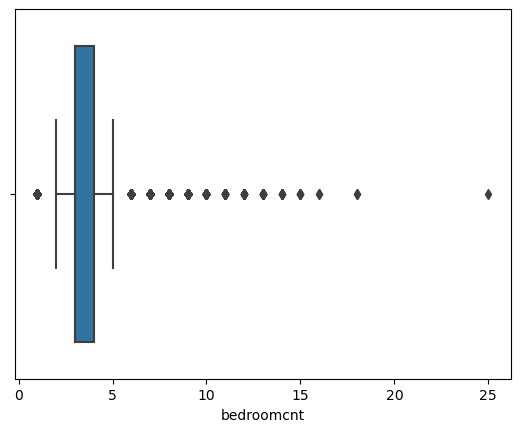

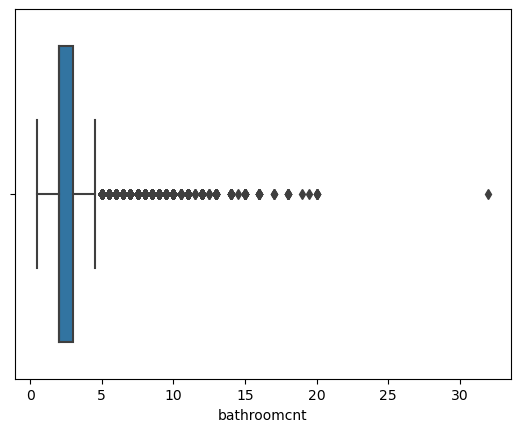

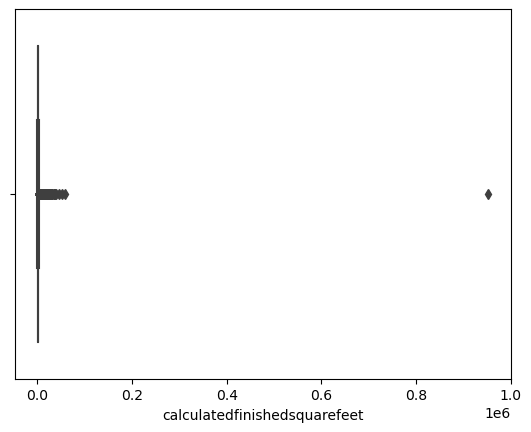

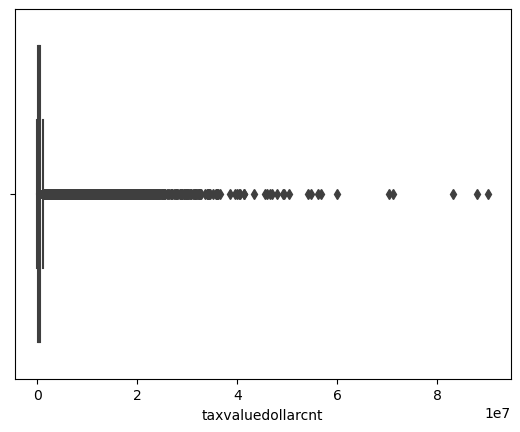

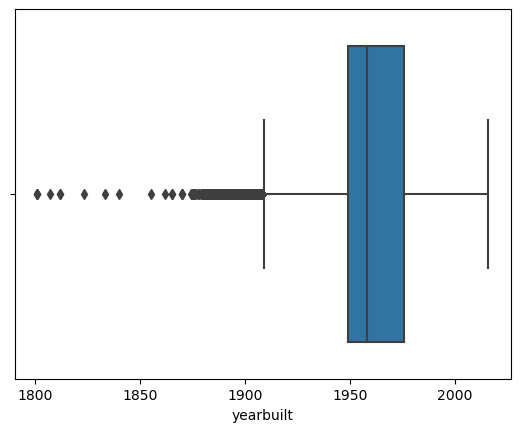

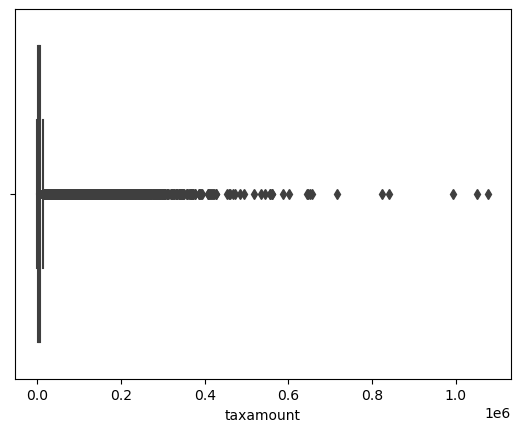

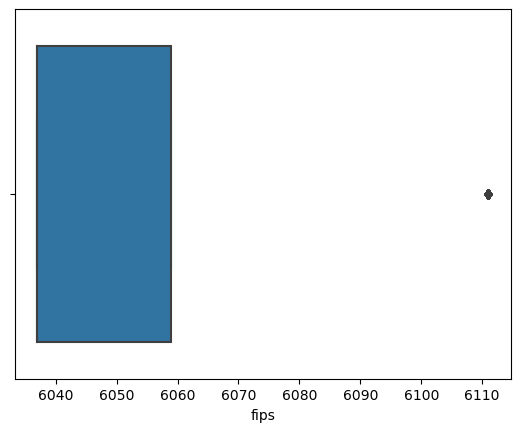

In [84]:
# Looking into the calculated sqfeet
for col in df:
    sns.boxplot(data=df, x=col)
    plt.show()

In [100]:
# the max calculated sqft is likely an error, droppping this value
df = df[df.calculatedfinishedsquarefeet != df.calculatedfinishedsquarefeet.max()]

In [102]:
# this is better, now lets look at the minimums
df.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,2.134908e+06,2.134908e+06,2.134908e+06,2.134908e+06,2.134908e+06,2.134908e+06,2.134908e+06
mean,3.308329e+00,2.245187e+00,1.863731e+03,4.608770e+05,1.960985e+03,5.619626e+03,6.048304e+03
std,9.211605e-01,9.858441e-01,9.632260e+02,6.746806e+05,2.213405e+01,7.784644e+03,2.032450e+01
min,1.000000e+00,5.000000e-01,1.000000e+00,2.200000e+01,1.801000e+03,1.648000e+01,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.260000e+03,1.896280e+05,1.949000e+03,2.546700e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.624000e+03,3.288570e+05,1.958000e+03,4.116040e+03,6.037000e+03
75%,4.000000e+00,3.000000e+00,2.209000e+03,5.350000e+05,1.976000e+03,6.415760e+03,6.059000e+03
max,2.500000e+01,3.200000e+01,5.922000e+04,9.018846e+07,2.016000e+03,1.078102e+06,6.111000e+03


In [114]:
# I think I will use standard deviations to eliminate the items that are likley not correct for the calculated fields

df.calculatedfinishedsquarefeet.mean(), df.calculatedfinishedsquarefeet.std()

(1863.7305181300553, 963.2259623273682)

In [146]:
# establish a range of values for dropping outliers with, I am goin to be cautious and use 0.05 as the buffer on each end
np.quantile(df['calculatedfinishedsquarefeet'], 0.95), np.quantile(df['calculatedfinishedsquarefeet'], 0.05)

(3537.0, 895.0)

In [149]:
# dropping outliers
df = df[(df.calculatedfinishedsquarefeet > 895) & (df.calculatedfinishedsquarefeet < 3537)]

In [151]:
# checking values
df.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,1.921364e+06,1.921364e+06,1.921364e+06,1.921364e+06,1.921364e+06,1.921364e+06,1.921364e+06
mean,3.311135e+00,2.177501e+00,1.766047e+03,3.988857e+05,1.960945e+03,4.905463e+03,6.048559e+03
std,8.160386e-01,7.534983e-01,6.024771e+02,3.622314e+05,2.105369e+01,4.167820e+03,2.049077e+01
min,1.000000e+00,5.000000e-01,8.960000e+02,2.200000e+01,1.801000e+03,1.648000e+01,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.294000e+03,1.901920e+05,1.950000e+03,2.553180e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.624000e+03,3.242070e+05,1.959000e+03,4.058060e+03,6.037000e+03
75%,4.000000e+00,3.000000e+00,2.127000e+03,5.076240e+05,1.974000e+03,6.106760e+03,6.059000e+03
max,1.600000e+01,1.500000e+01,3.536000e+03,4.124780e+07,2.016000e+03,4.678122e+05,6.111000e+03
